In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sb

In [4]:
spotify_df = pd.read_csv("SpotifyTopHits.csv").drop(columns = ["popularity"])

In [5]:
# cleaning...
#spotify_df.count()
no_set_spotify = spotify_df.loc[spotify_df.genre!= "set()"] #drop rows where "set()" is the genre
reset_babyyy = no_set_spotify.reset_index().drop(columns = ["index"])
reset_babyyy
duplicated_songs = reset_babyyy.duplicated()
duplicated_songs

0       False
1       False
2       False
3       False
4       False
        ...  
1973    False
1974    False
1975    False
1976    False
1977    False
Length: 1978, dtype: bool

In [6]:
# checking to see if there are any completely duplicated rows that we could drop
indexes_true = []

for index, value in enumerate(duplicated_songs):
    if value == True:
        indexes_true.append(index)
print(indexes_true)

[160, 178, 186, 214, 234, 307, 371, 373, 391, 427, 442, 464, 475, 486, 492, 543, 582, 631, 670, 687, 729, 731, 798, 817, 825, 826, 919, 937, 943, 961, 962, 972, 989, 1038, 1056, 1110, 1119, 1144, 1182, 1186, 1207, 1234, 1289, 1327, 1333, 1399, 1429, 1446, 1496, 1504, 1534, 1543, 1553, 1592, 1621, 1625, 1640, 1660, 1712, 1812, 1900, 1908, 1962]


In [7]:
# drop duplicated rows 
spotify = reset_babyyy.drop(indexes_true)
len(spotify)

1915

In [8]:
grouped = spotify.groupby("genre").count()

In [9]:
# get list of all genre names
genre_names = grouped.index.values.tolist()
#genre_names

In [10]:
# there are many genres that are very similar, thus we decided to group similar genres 
# grouped based on first word in the list if multiple genres were listed

# Our genres:
#"Dance/Electronic" = 0
#"Folk/Acoustic" = 1
#"R&B" = 2
#"World/Traditional" = 3
#"country" = 4
#"easy listening" = 5
#"hip hop" = 6
#"latin" = 7
#"metal" = 8
#"pop" = 9
#"rock" = 10

In [11]:
# group into our genres
dance_elec = spotify.loc[spotify.genre=='Dance/Electronic'].reset_index().drop(columns = "index")
folk_acou = spotify[(spotify['genre'] == 'Folk/Acoustic, pop') | (spotify['genre'] == 'Folk/Acoustic, rock') | (spotify['genre'] == 'Folk/Acoustic, rock, pop')].reset_index().drop(columns = "index")
r_b = spotify.loc[spotify.genre=='R&B'].reset_index().drop(columns = "index")
world_tra = spotify[(spotify['genre'] == 'World/Traditional, Folk/Acoustic') | (spotify['genre'] == 'World/Traditional, hip hop') | (spotify['genre'] == 'World/Traditional, pop') | (spotify['genre'] == 'World/Traditional, pop, Folk/Acoustic')| (spotify['genre'] == 'World/Traditional, rock')| (spotify['genre'] == 'World/Traditional, rock, pop')].reset_index().drop(columns = "index")
country = spotify[(spotify['genre'] == 'country') | (spotify['genre'] == 'country, latin')].reset_index().drop(columns = "index")
ez_listen = spotify.loc[spotify.genre=='easy listening'].reset_index().drop(columns = "index")
hip_hop = spotify[(spotify['genre'] == 'hip hop') | (spotify['genre'] == 'hip hop, Dance/Electronic')| (spotify['genre'] == 'hip hop, R&B')| (spotify['genre'] == 'hip hop, country')| (spotify['genre'] == 'hip hop, latin, Dance/Electronic')| (spotify['genre'] == 'hip hop, pop')| (spotify['genre'] == 'hip hop, pop, Dance/Electronic')| (spotify['genre'] == 'hip hop, pop, R&B')| (spotify['genre'] == 'hip hop, pop, R&B, Dance/Electronic')| (spotify['genre'] == 'hip hop, pop, R&B, latin')| (spotify['genre'] == 'hip hop, pop, country')| (spotify['genre'] == 'hip hop, pop, latin')| (spotify['genre'] == 'hip hop, pop, rock')| (spotify['genre'] == 'hip hop, pop, pop')].reset_index().drop(columns = "index")
latin = spotify.loc[spotify.genre=='latin'].reset_index().drop(columns = "index")
metal = spotify.loc[spotify.genre=='metal'].reset_index().drop(columns = "index")
pop = spotify[(spotify['genre'] == 'pop')| (spotify['genre'] == 'pop, Dance/Electronic')| (spotify['genre'] == 'pop, Folk/Acoustic')| (spotify['genre'] == 'pop, R&B')| (spotify['genre'] == 'pop, R&B, Dance/Electronic')| (spotify['genre'] == 'pop, R&B, easy listening')| (spotify['genre'] == 'pop, country')| (spotify['genre'] == 'pop, easy listening, Dance/Electronic')| (spotify['genre'] == 'pop, easy listening, jazz')| (spotify['genre'] == 'pop, latin')| (spotify['genre'] == 'pop, rock')| (spotify['genre'] == 'pop, rock, Dance/Electronic')| (spotify['genre'] == 'pop, rock, Folk/Acoustic')| (spotify['genre'] == 'pop, rock, metal')].reset_index().drop(columns = "index")
rock = spotify[(spotify['genre'] == 'rock')| (spotify['genre'] == 'rock, Dance/Electronic')| (spotify['genre'] == 'rock, Folk/Acoustic, easy listening')| (spotify['genre'] == 'rock, Folk/Acoustic, pop')| (spotify['genre'] == 'rock, R&B, Folk/Acoustic, pop')| (spotify['genre'] == 'rock, blues')| (spotify['genre'] == 'rock, blues, latin')| (spotify['genre'] == 'rock, classical')| (spotify['genre'] == 'rock, easy listening')| (spotify['genre'] == 'rock, metal')| (spotify['genre'] == 'rock, pop')| (spotify['genre'] == 'rock, pop, Dance/Electronic')| (spotify['genre'] == 'rock, pop, metal')| (spotify['genre'] == 'rock, pop, metal, Dance/Electronic')].reset_index().drop(columns = "index")

In [12]:
# rename genres as a numberical category
dance_elec['genre'] = 0
folk_acou['genre'] = 1
r_b['genre'] = 2
world_tra['genre'] = 3
country['genre'] = 4
ez_listen['genre'] = 5
hip_hop['genre'] = 6
latin['genre'] = 7
metal['genre'] = 8
pop['genre'] = 9
rock['genre'] = 10

In [13]:
# make a mega dataframe with numerical genres
our_genres_all = pd.concat([dance_elec, folk_acou, r_b, world_tra, country, ez_listen, hip_hop, latin, metal, pop, rock])

# most popular genres – something interesting
our_genres_grouped = our_genres_all.groupby("genre").count()
our_genres_grouped.sort_values(by = "artist", ascending = False)["artist"] 

#unequal amounts of data per genre, narrow down to only be genres with at least 20 songs

our_genres = pd.concat([dance_elec, country, hip_hop, pop, rock])

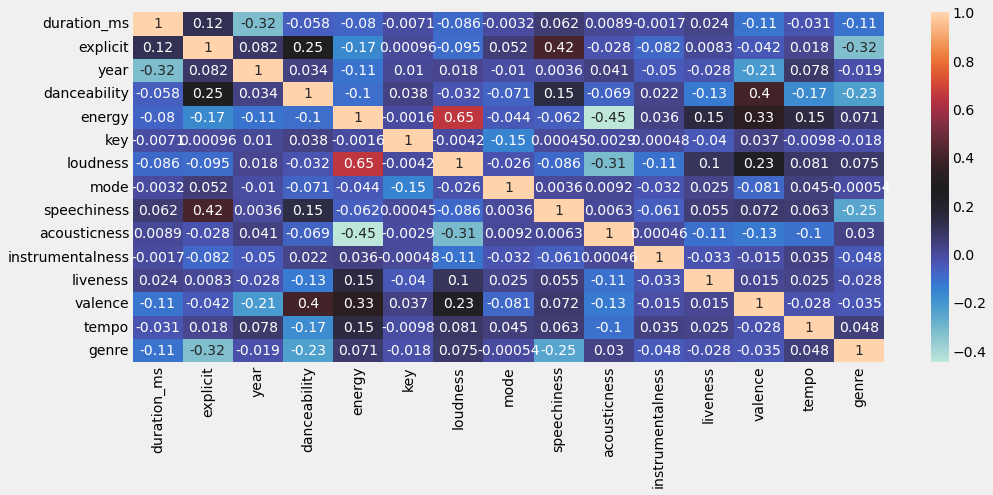

In [14]:
# checking correlations between all variables – kinda just for fun
plt.figure(figsize=(15,6))
dataplot= sb.heatmap(our_genres_all.corr(), cmap="icefire", annot=True)

Text(0.5, 1.0, 'danceability')

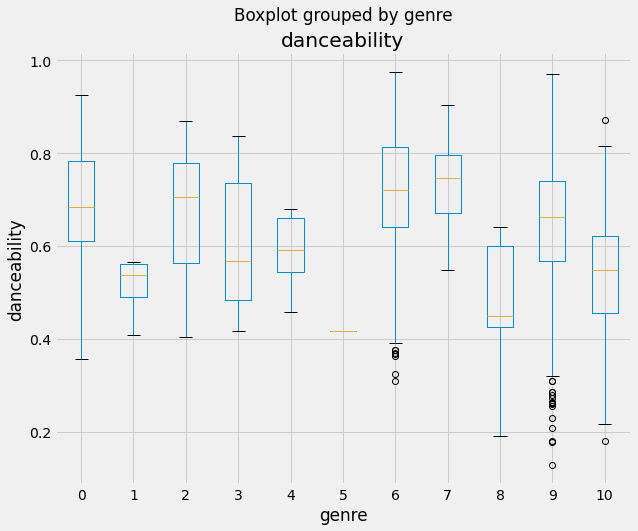

In [15]:
# danceability box plots
our_genres_all.boxplot(column=['danceability'], by='genre', figsize=(10,8))
plt.ylabel('danceability')
plt.title('danceability')

Text(0.5, 1.0, 'energy')

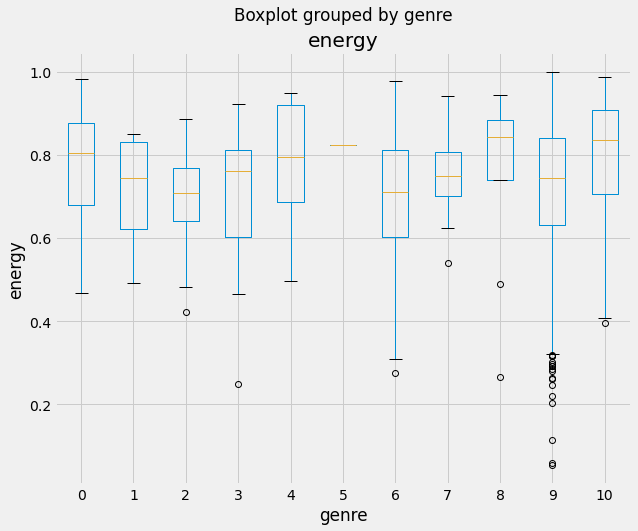

In [16]:
# energy box plots
our_genres_all.boxplot(column=['energy'], by='genre', figsize=(10,8))
plt.ylabel('energy')
plt.title('energy')

Text(0.5, 1.0, 'key')

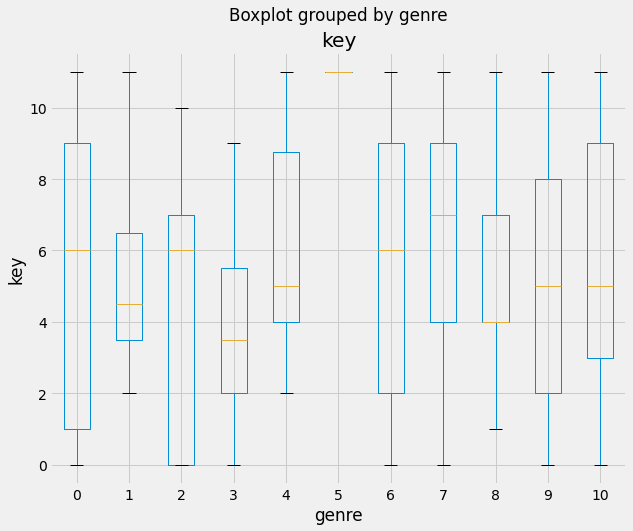

In [17]:
# key box plots
our_genres_all.boxplot(column=['key'], by='genre', figsize=(10,8))
plt.ylabel('key')
plt.title('key')

Text(0.5, 1.0, 'loudness')

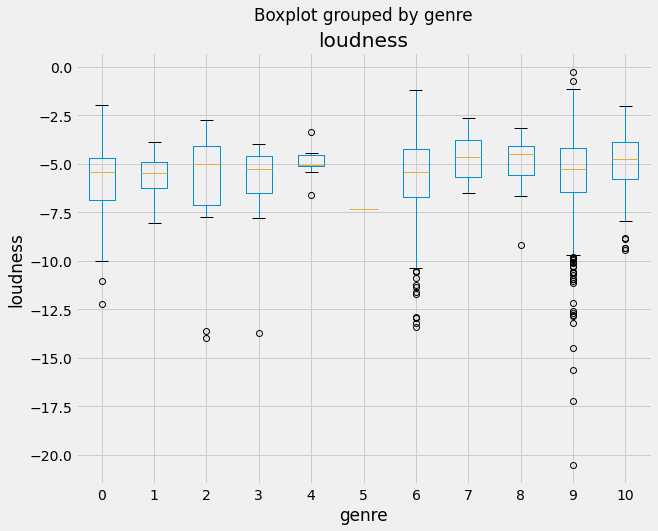

In [18]:
# loudness box plots
our_genres_all.boxplot(column=['loudness'], by='genre', figsize=(10,8))
plt.ylabel('loudness')
plt.title('loudness')

Text(0.5, 1.0, 'mode')

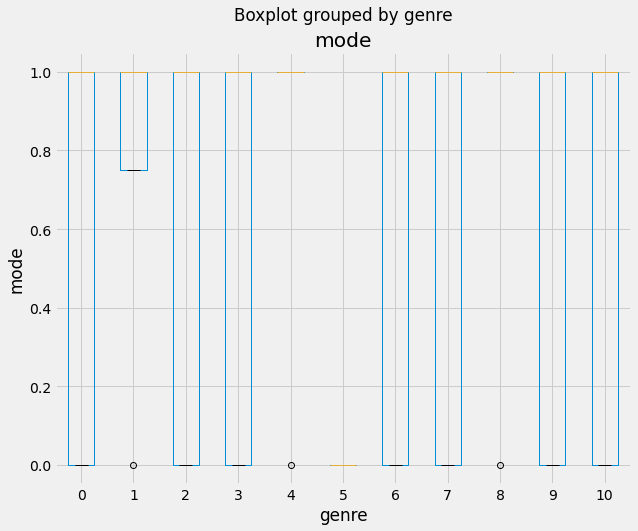

In [19]:
# mode box plots COME BACK
our_genres_all.boxplot(column=['mode'], by='genre', figsize=(10,8))
plt.ylabel('mode')
plt.title('mode')

Text(0.5, 1.0, 'speechiness')

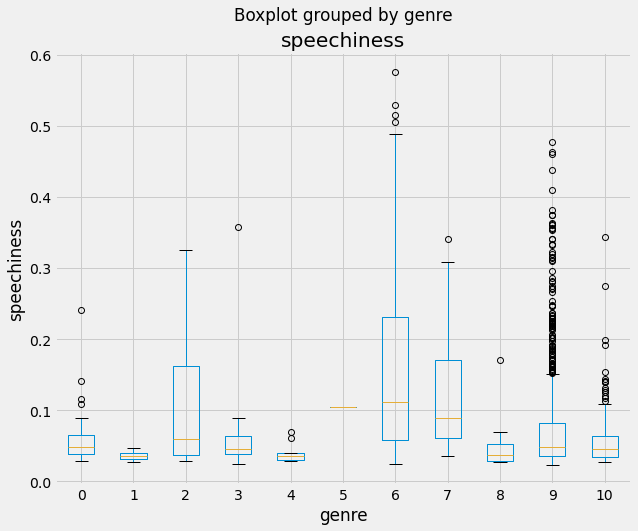

In [20]:
# speechiness box plots
our_genres_all.boxplot(column=['speechiness'], by='genre', figsize=(10,8))
plt.ylabel('speechiness')
plt.title('speechiness')

Text(0.5, 1.0, 'instrumentalness')

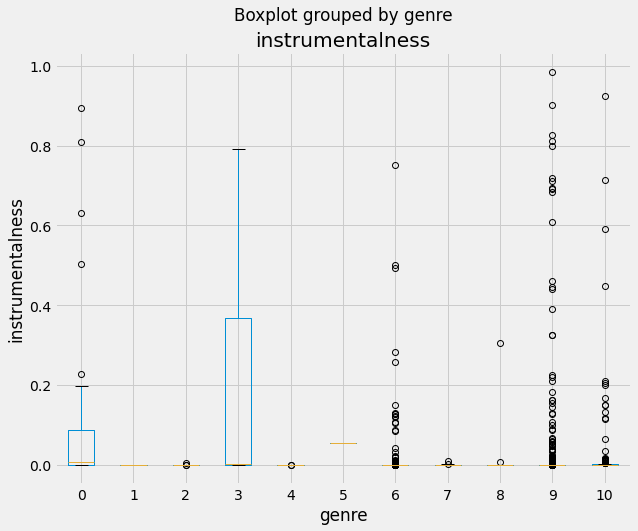

In [21]:
# instrumentalness box plots
our_genres_all.boxplot(column=['instrumentalness'], by='genre', figsize=(10,8))
plt.ylabel('instrumentalness')
plt.title('instrumentalness')

Text(0.5, 1.0, 'liveness')

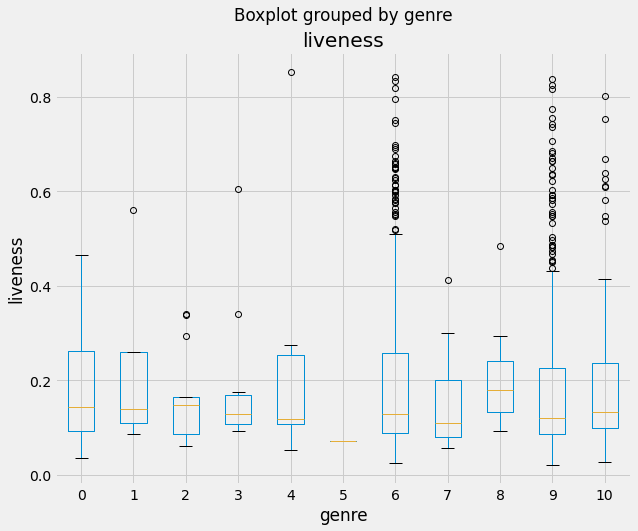

In [22]:
# liveness box plots
our_genres_all.boxplot(column=['liveness'], by='genre', figsize=(10,8))
plt.ylabel('liveness')
plt.title('liveness')

Text(0.5, 1.0, 'valence')

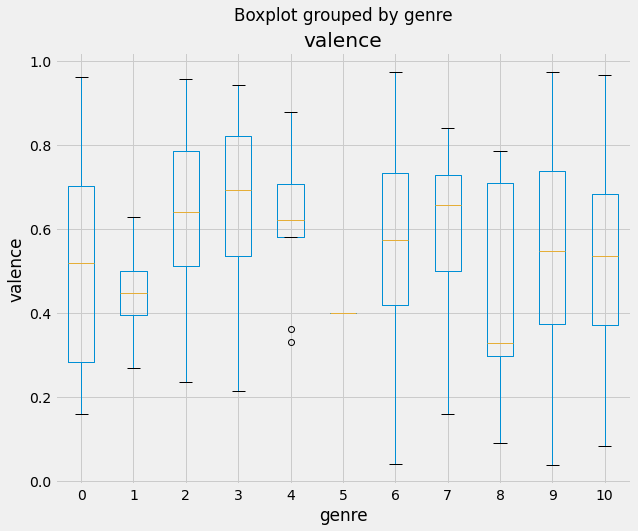

In [23]:
# valence box plots
our_genres_all.boxplot(column=['valence'], by='genre', figsize=(10,8))
plt.ylabel('valence')
plt.title('valence')

Text(0.5, 1.0, 'tempo')

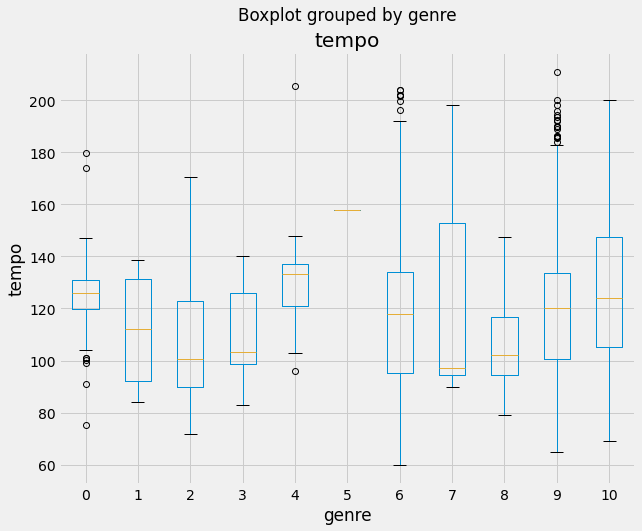

In [24]:
# tempo box plots
our_genres_all.boxplot(column=['tempo'], by='genre', figsize=(10,8))
plt.ylabel('tempo')
plt.title('tempo')

In [25]:
# building a knn prediction model

In [26]:
def minmax_scaling(x):
    "Convert any array of numbers"
    return (x - np.min(x))/(np.max(x)-np.min(x))  

our_genres_standard = pd.DataFrame(
        {"Genre": our_genres["genre"],
         "Danceability": minmax_scaling(our_genres["danceability"]),
         "Energy": minmax_scaling(our_genres["energy"]),
         #"Key": minmax_scaling(our_genres["key"]),
         #"Loudness": minmax_scaling(our_genres["loudness"]),
         #"Mode": minmax_scaling(our_genres["mode"]),
         #"Speechiness": minmax_scaling(our_genres["speechiness"]),
         "Acousticness": minmax_scaling(our_genres["acousticness"]),
         "Instrumentalness": minmax_scaling(our_genres["instrumentalness"]),
         "Liveness": minmax_scaling(our_genres["liveness"]),
         "Valence": minmax_scaling(our_genres["valence"]),
         "Tempo": minmax_scaling(our_genres["tempo"])
        })

In [27]:
genres_permuted=our_genres_standard.sample(frac=1)

X_train=genres_permuted.iloc[0:1536].drop(columns=["Genre"])
X_test=genres_permuted.iloc[1536:1920].drop(columns=["Genre"])
Y_train=genres_permuted.iloc[0:1536].Genre
Y_test=genres_permuted.iloc[1536:1920].Genre

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset into features and target variable
X = our_genres_standard.drop(["Genre"], axis=1) # Feature matrix
Y = our_genres_standard['Genre'] # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating KNN classifier
knn = KNeighborsClassifier(n_neighbors=30)

# Training the model
knn.fit(X_train, Y_train)

# Predicting the target variable for test set
Y_pred = knn.predict(X_test)

np.mean(Y_test==Y_pred)

0.5281501340482574

In [29]:
def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def all_distances(X_train, point):
    """The distance between point (an array of numbers) and the numbers in row i of attribute data frame."""
    attributes = X_train.copy()
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point,axis=1)

def multi_closest(X_train, Y_train, point, k):
    """A df containing the k closest rows in the training df to array 'point' """
    attributes=X_train.copy()
    attributes['Distance']=all_distances(attributes, point)
    attributes['Origin']=Y_train
    attributes=attributes.sort_values('Distance')    
    topk = attributes.head(k)
    return topk

def multi_majority(topkorigins):
    """Return the origin label with the most occurrences in the "Origin" column."""
    origin_counts = topkorigins["Origin"].value_counts()
    return origin_counts.idxmax()
    
def multi_classify(X_train,Y_train, X_test, k):
    n=X_test.shape[0]
    pred_origin = np.array([])
    for i in np.arange(n):
        topkorigins = multi_closest(X_train,Y_train, X_test.iloc[i], k)
        pred_origin = np.append(pred_origin,multi_majority(topkorigins))
    
    report_df=X_test.copy()
    report_df['Origin']=pred_origin
    return report_df

In [30]:
# test
#test_df = multi_classify(X_train,Y_train, X_test,7)

In [31]:
# what's the best k to use

#multi_k_values = list(range(1,20))
#multi_accuracy_list = []

#for k in multi_k_values:
    #multi_test_predictions = multi_classify(X_train, Y_train, X_test, k)
    #multi_accuracy_list.append(np.mean(Y_test==multi_test_predictions.Origin))
    

#plt.plot(multi_k_values, multi_accuracy_list)
#plt.xlabel("K value")
#plt.ylabel("Accuracy")
#plt.title("Measuring Prediction Accuracy across K Values")

In [32]:
# trying new dataset (with more data!)
better_spotify = pd.read_csv("genres_v2.csv").drop(columns = ['uri', 'track_href', 'analysis_url', 'Unnamed: 0', 'title', 'type'])

scrubbyCLEAN_spotify = better_spotify.drop_duplicates(subset = ["id"]).dropna().drop(columns = ["id"]).reset_index().drop(columns = ["index", "song_name"])
scrubbyCLEAN_spotify

/var/folders/75/m34rxpl11p9g0fctvfdz_cyr0000gn/T/ipykernel_43545/2159058925.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  better_spotify = pd.read_csv("genres_v2.csv").drop(columns = ['uri', 'track_href', 'analysis_url', 'Unnamed: 0', 'title', 'type'])


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18347,0.526,0.819,7,-6.728,1,0.2980,0.00206,0.000003,0.3360,0.5810,159.910,281886,4,Hiphop
18348,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,160.299,209582,4,Hiphop
18349,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,154.272,213898,4,Hiphop
18350,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,184.160,271867,4,Hiphop


In [33]:
# how many songs per genre?
scrubbyCLEAN_spotify["genre"].value_counts()

Underground Rap    5044
Dark Trap          4578
Hiphop             2323
RnB                1875
Emo                1667
Rap                1274
Trap Metal         1187
Pop                 404
Name: genre, dtype: int64

In [34]:
# give numerical values to each genre
genre0 = scrubbyCLEAN_spotify.replace("Underground Rap", 0)
genre1 = genre0.replace("Dark Trap", 1)
genre2 = genre1.replace("Hiphop", 2)
genre3 = genre2.replace("RnB", 3)
genre4 = genre3.replace("Emo", 4)
genre5 = genre4.replace("Rap", 5)
genre6 = genre5.replace("Trap Metal",6)
genre7 = genre6.replace("Pop",7)

numerical_genres = genre7.reset_index().drop(columns = "index")
numerical_genres

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,124539,4,1
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,224427,4,1
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,98821,4,1
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,123661,3,1
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,123298,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18347,0.526,0.819,7,-6.728,1,0.2980,0.00206,0.000003,0.3360,0.5810,159.910,281886,4,2
18348,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,160.299,209582,4,2
18349,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,154.272,213898,4,2
18350,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,184.160,271867,4,2


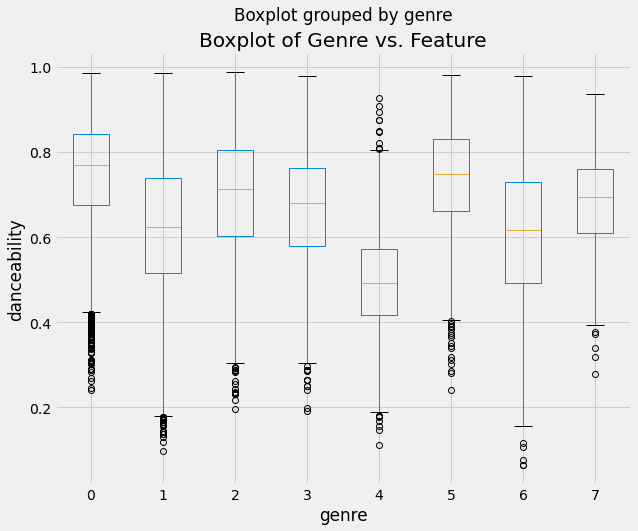

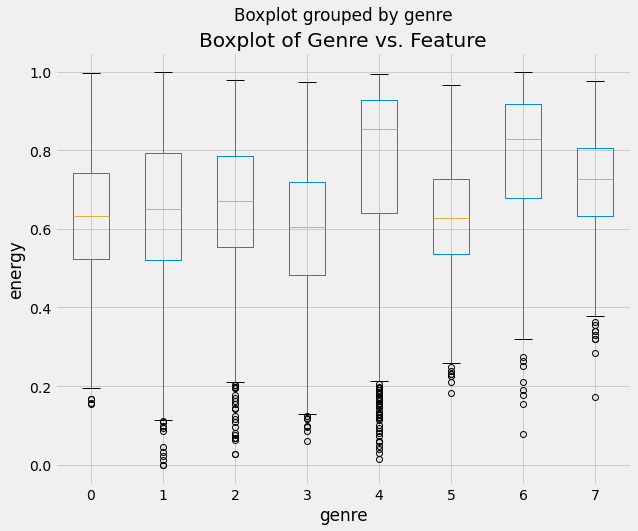

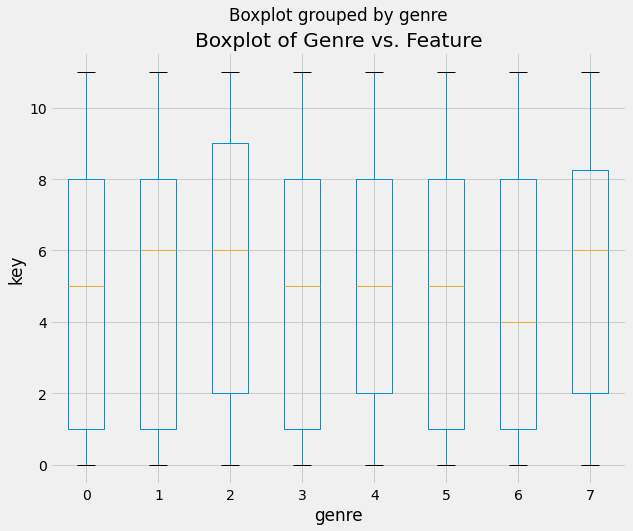

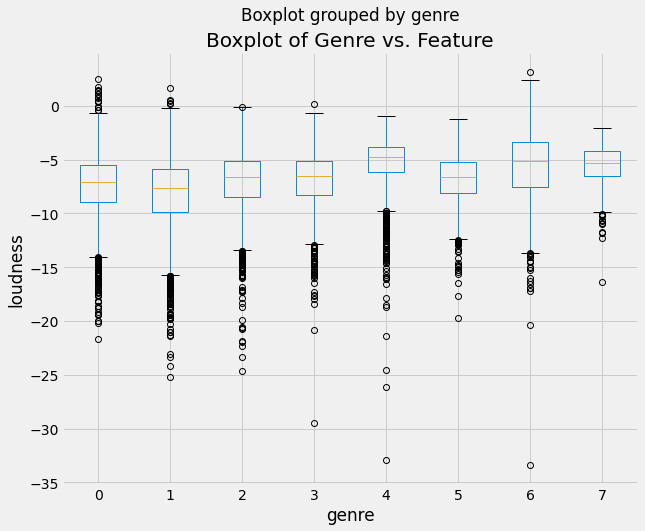

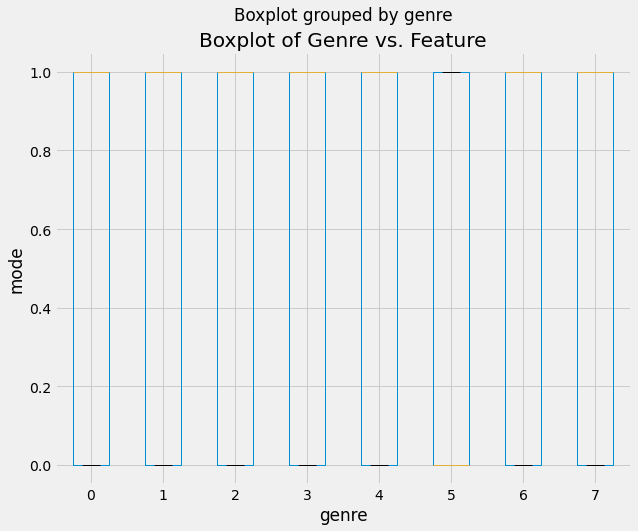

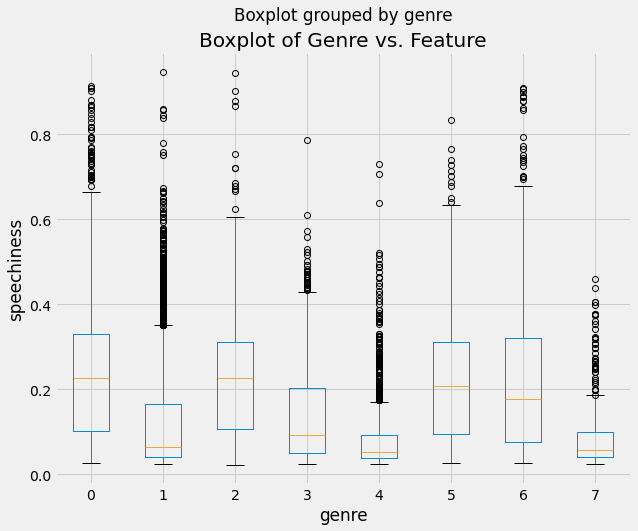

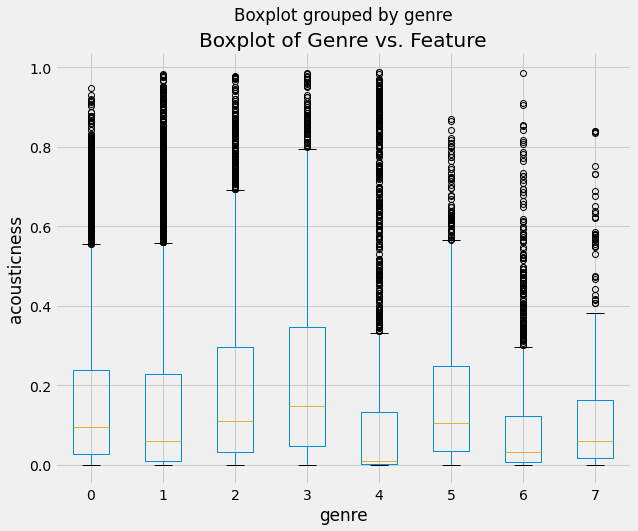

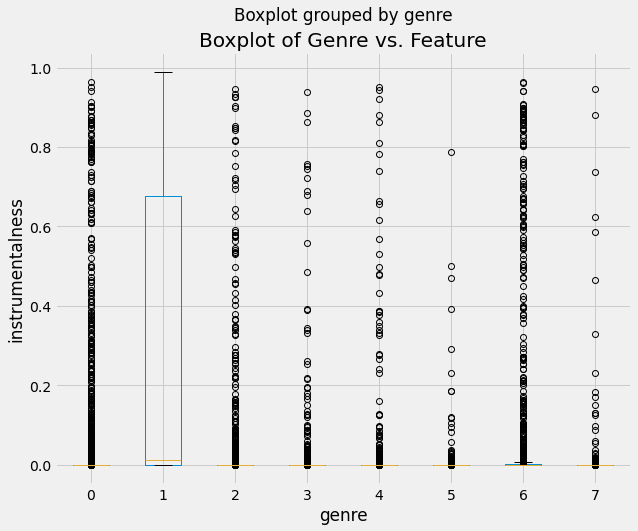

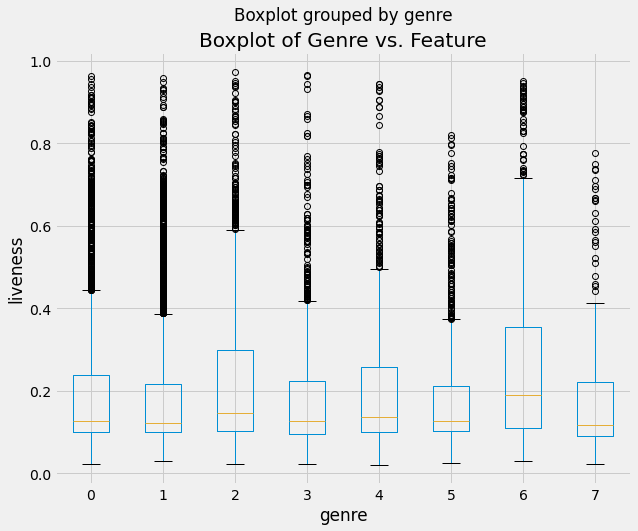

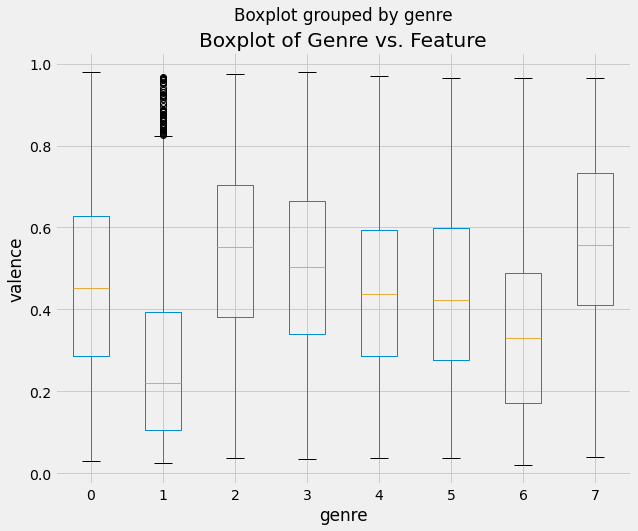

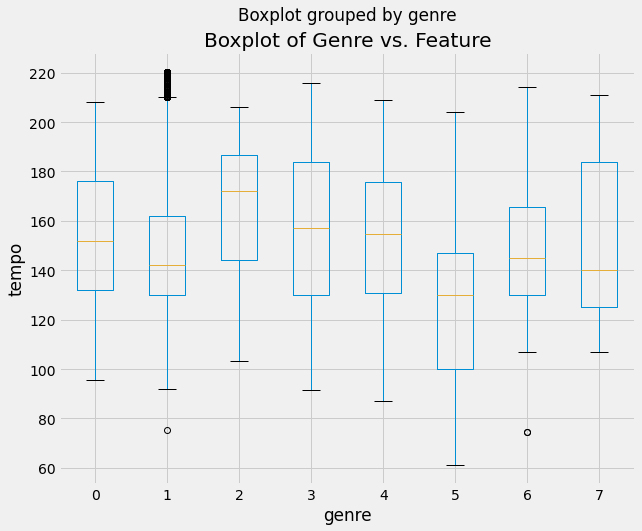

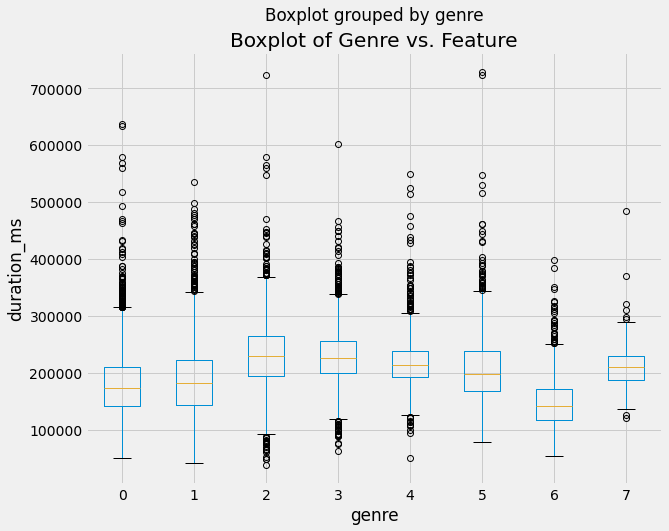

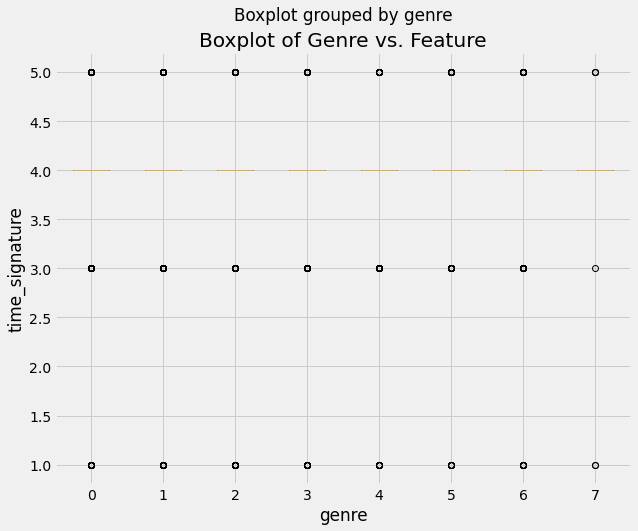

In [35]:
# NOW check correlations (again! :/)
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
for i in features:
    numerical_genres.boxplot(column=[i], by='genre', figsize=(10,8))
    plt.ylabel(i)
    plt.title('Boxplot of Genre vs. Feature')

In [36]:
# building a knn prediction model AGAIN 

In [37]:
def minmax_scaling(x):
    "Convert any array of numbers"
    return (x - np.min(x))/(np.max(x)-np.min(x))  

spotify_standard = pd.DataFrame(
        {"Genre": numerical_genres["genre"],
         "Danceability": minmax_scaling(numerical_genres["danceability"]),
         "Energy": minmax_scaling(numerical_genres["energy"]),
         "Key": minmax_scaling(numerical_genres["key"]),
         "Loudness": minmax_scaling(numerical_genres["loudness"]),
         "Mode": minmax_scaling(numerical_genres["mode"]),
         "Speechiness": minmax_scaling(numerical_genres["speechiness"]),
         "Acousticness": minmax_scaling(numerical_genres["acousticness"]),
         "Instrumentalness": minmax_scaling(numerical_genres["instrumentalness"]),
         "Liveness": minmax_scaling(numerical_genres["liveness"]),
         "Valence": minmax_scaling(numerical_genres["valence"]),
         "Tempo": minmax_scaling(numerical_genres["tempo"]),
         "Duration_MS": minmax_scaling(numerical_genres["duration_ms"])
        })

In [38]:
genres_permuted=spotify_standard.sample(frac=1)

X_train1=genres_permuted.iloc[0:14682].drop(columns=["Genre"])
X_test1=genres_permuted.iloc[14682:18352].drop(columns=["Genre"])
Y_train1=genres_permuted.iloc[0:14682].Genre
Y_test=genres_permuted.iloc[14682:18352].Genre

In [39]:
def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def all_distances(X_train1, point):
    """The distance between point (an array of numbers) and the numbers in row i of attribute data frame."""
    attributes = X_train1.copy()
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point,axis=1)

def multi_closest(X_train1, Y_train1, point, k):
    """A df containing the k closest rows in the training df to array 'point' """
    attributes=X_train1.copy()
    attributes['Distance']=all_distances(attributes, point)
    attributes['Origin']=Y_train1
    attributes=attributes.sort_values('Distance')    
    topk = attributes.head(k)
    return topk

def multi_majority(topkorigins):
    """Return the origin label with the most occurrences in the "Origin" column."""
    origin_counts = topkorigins["Origin"].value_counts()
    return origin_counts.idxmax()
    
def multi_classify(X_train1,Y_train1, X_test1, k):
    n=X_test1.shape[0]
    pred_origin = np.array([])
    for i in np.arange(n):
        topkorigins = multi_closest(X_train1,Y_train1, X_test1.iloc[i], k)
        pred_origin = np.append(pred_origin,multi_majority(topkorigins))
    
    report_df=X_test1.copy()
    report_df['Origin']=pred_origin
    return report_df

In [40]:
#myheadhurts = multi_classify(X_train1,Y_train1, X_test1,3)
#myheadhurts

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset into features and target variable
X = spotify_standard.drop(["Genre"], axis=1)
Y = spotify_standard['Genre']

# Splitting the dataset into training and testing sets
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# Creating KNN classifier
knn = KNeighborsClassifier(n_neighbors=20)

# Training the model
knn.fit(X_train2, Y_train2)

# Predicting the target variable for test set
Y_pred = knn.predict(X_test2)

In [42]:
np.mean(Y_test2==Y_pred)
#still not very good.. maybe songs aren't all that differnet – fundamentally, songs are very similar???

0.5031326614001634

In [43]:
grouped = scrubbyCLEAN_spotify.groupby("genre").mean()

In [44]:
# understanding how each genre shows itself within each variable
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

og_standardized = pd.DataFrame(
        {"acousticness": standard_units(grouped.acousticness),
         'loudness': standard_units(grouped.loudness),
         'speechiness' : standard_units(grouped.speechiness),
         "danceability": standard_units(grouped.danceability),
         "energy": standard_units(grouped.energy),
         "tempo": standard_units(grouped.tempo),
         "instrumentalness": standard_units(grouped.instrumentalness),
         'liveness': standard_units(grouped.liveness),
         'valence': standard_units(grouped.valence)})
og_standardized

,acousticness,loudness,speechiness,danceability,energy,tempo,instrumentalness,liveness,valence
genre,,,,,,,,,
Dark Trap,-0.099625,-1.442179,-0.647341,-0.438595,-0.456541,-0.097048,2.421224,-0.470793,-1.804017
Emo,-0.501611,1.187540,-1.320262,-1.956404,1.239067,0.272149,-0.440689,-0.115842,-0.014974
Hiphop,0.935509,-0.479275,0.874693,0.489735,-0.288101,1.236197,-0.369539,0.643574,0.934973
Pop,-0.813459,1.082243,-1.178650,0.342335,0.473675,0.027023,-0.396049,-0.705840,1.218853
Rap,0.199585,-0.299176,0.812350,0.964896,-0.760244,-2.223871,-0.528938,-0.638057,-0.062987
RnB,1.701100,-0.340960,-0.441740,0.120345,-1.168434,0.599728,-0.476114,-0.661670,0.589626
Trap Metal,-1.503738,1.110418,0.846308,-0.645318,1.608197,-0.087455,0.141594,2.221117,-1.006422
Underground Rap,0.082239,-0.818612,1.054642,1.123006,-0.647617,0.273276,-0.351489,-0.272490,0.144947


In [45]:
#grouped_df = og_standardized.groupby("genre")[[ "energy", "loudness", 'danceability', 'tempo','valence',"speechiness", "acousticness", "instrumentalness", "liveness", "tempo"]].mean()

# Create a stacked bar chart of audio feature values by genre
#colors = ['orange','grey','blue', 'magenta', 'pink', 'maroon', 'lightblue', 'red', 'lightgreen', 'green']
#ax = grouped_df.plot(kind="bar", stacked=True, figsize=(20, 20), color = colors)

# Set the title and axis labels
#ax.set_title("Stacked Bar Chart of Audio Feature Values by Genre Group")
#ax.set_ylabel("Audio Feature Value")

#labels = ['Dark Trap','Emo', 'Hiphop','Pop','Rap', 'RnB', 'Trap Metal', 'Underground Rap']
#plt.figure(figsize = (15,6))
#ax.set_xticklabels(labels)
#ax.axes.get_yaxis().set_visible(False)
#ax.set_ylabel('Composition of Audio Qualities in Each Genre')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.show()

In [46]:
# trying for higher accuracy – predict between two very different genres (jazz and rock)
newest_spotify=pd.read_csv('spotifyjazz.csv')
#newest_spotify

In [47]:
clean_spotify = newest_spotify.drop_duplicates(subset=['id']).dropna()
#clean_spotify

cleaner_spotify = clean_spotify.drop(columns = ['type','uri', 'track_href', 'analysis_url', 'Unnamed: 0'])

jazzrock = cleaner_spotify[cleaner_spotify['genre'].isin(['jazz', 'rock'])]
#jazzrock

In [48]:
#figuring out whether to compare jazz and edm music or jazz and rock

jazz = cleaner_spotify[cleaner_spotify['genre']=='jazz'].drop(columns=['id', 'song_name', 'artist', 'genre']).reset_index()
electro = cleaner_spotify[cleaner_spotify['genre']=='electronic'].drop(columns=['id', 'song_name', 'artist', 'genre']).head(965).reset_index()
rock = cleaner_spotify[cleaner_spotify['genre']=='rock'].drop(columns=['id', 'song_name', 'artist', 'genre']).head(965).reset_index()

(jazz-electro).mean()
(jazz-rock).mean() # greater difference, consider these two genres

index              -4053.526425
danceability          -0.009834
energy                -0.468081
key                   -0.397927
loudness              -9.034345
mode                  -0.067358
speechiness           -0.007893
acousticness           0.593025
instrumentalness       0.480287
liveness              -0.047876
valence               -0.203577
tempo                -18.545156
duration_ms        -3617.575130
time_signature        -0.108808
dtype: float64

In [49]:
no_strings = jazzrock.drop(columns = ["id", "song_name", "artist"])

# make genre numerical
fix_jazz = no_strings.replace("jazz", 0)
fix_rock = fix_jazz.replace("rock", 1)


jazzROCK_numerical = fix_rock.reset_index().drop(columns = "index")
jazzROCK_numerical

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.396,0.1270,9.0,-23.480,1.0,0.0338,0.928000,0.627000,0.697,0.126,117.802,297320,4,0
1,0.478,0.0294,0.0,-25.319,1.0,0.0453,0.993000,0.948000,0.105,0.148,124.308,324200,3,0
2,0.664,0.1200,10.0,-16.577,1.0,0.0431,0.981000,0.922000,0.113,0.274,119.744,223000,3,0
3,0.302,0.0134,10.0,-27.372,1.0,0.0418,0.991000,0.925000,0.129,0.433,85.572,139052,3,0
4,0.539,0.0678,0.0,-18.039,1.0,0.0468,0.967000,0.168000,0.114,0.263,124.105,294667,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.557,0.5330,10.0,-6.817,0.0,0.0252,0.049200,0.000000,0.205,0.233,143.994,238733,4,1
2107,0.450,0.5250,3.0,-6.893,1.0,0.0271,0.522000,0.000002,0.254,0.371,187.525,232200,3,1
2108,0.469,0.5610,9.0,-7.596,1.0,0.0251,0.008710,0.000005,0.337,0.356,87.629,302787,4,1
2109,0.391,0.8150,9.0,-6.197,1.0,0.0518,0.017700,0.002260,0.276,0.647,84.383,299240,4,1


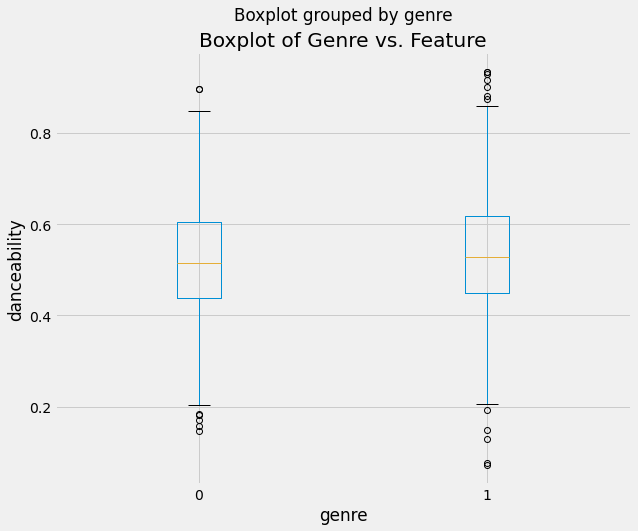

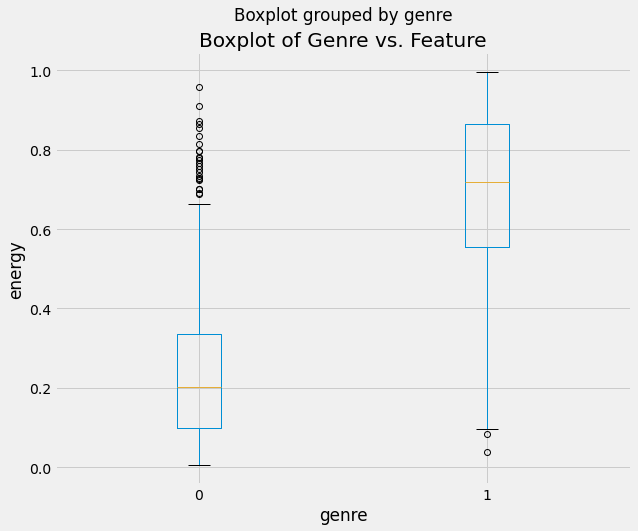

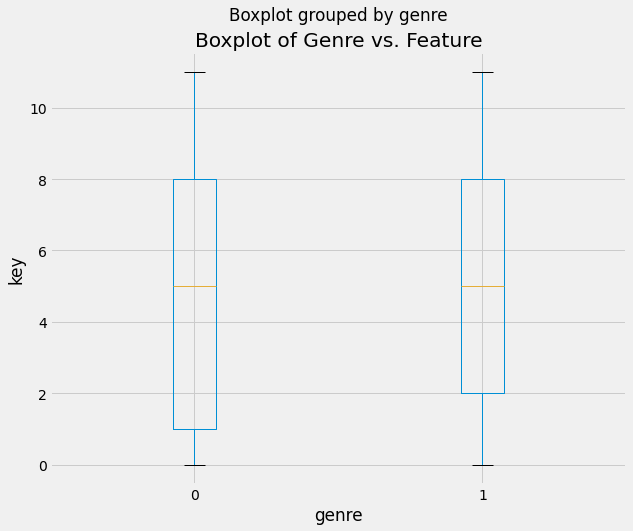

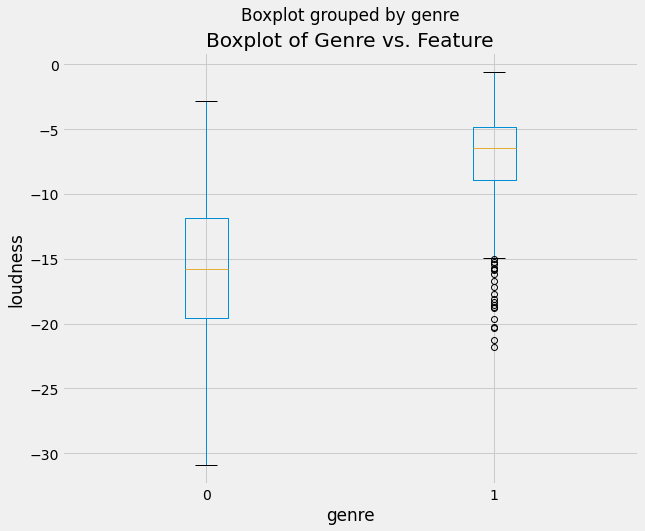

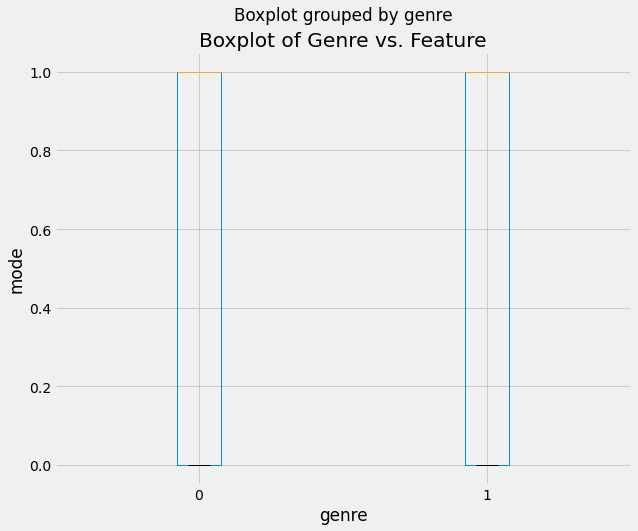

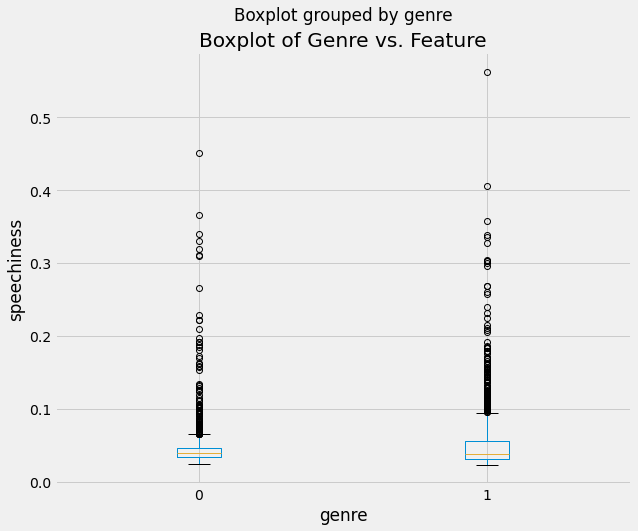

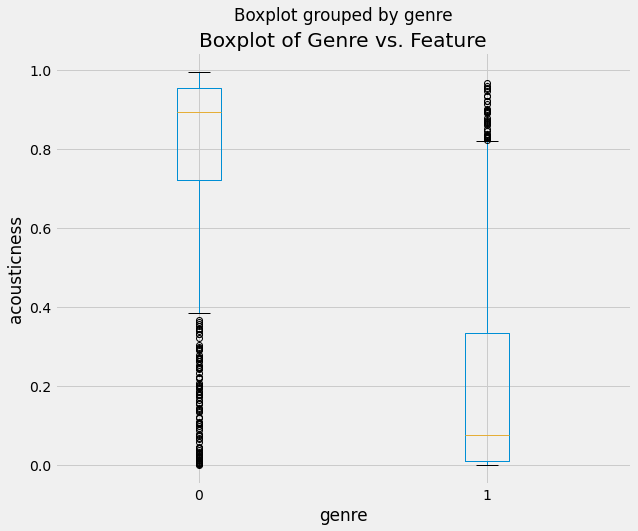

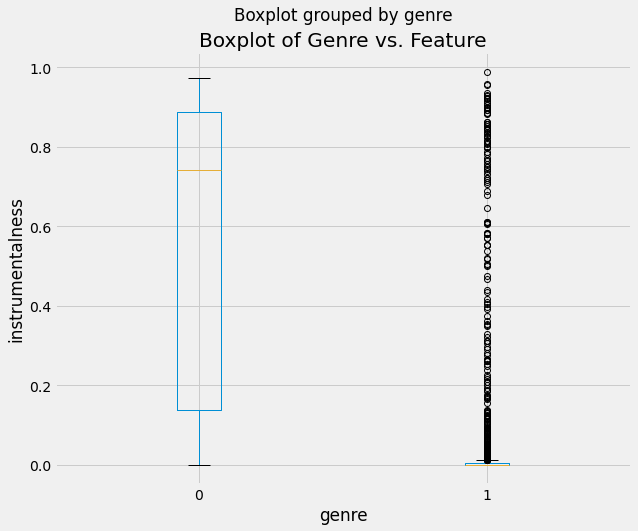

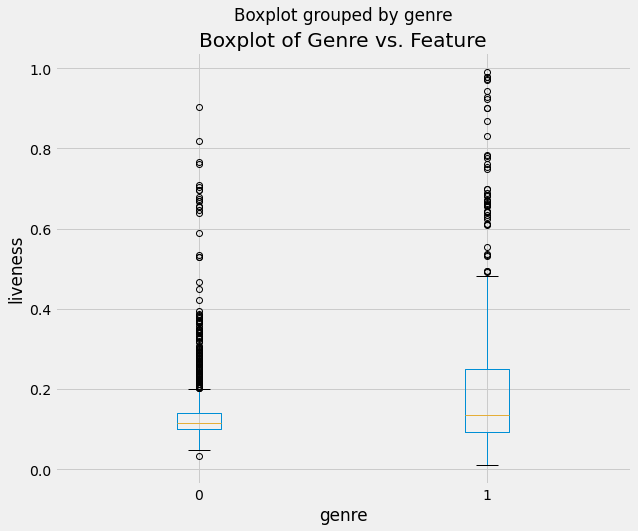

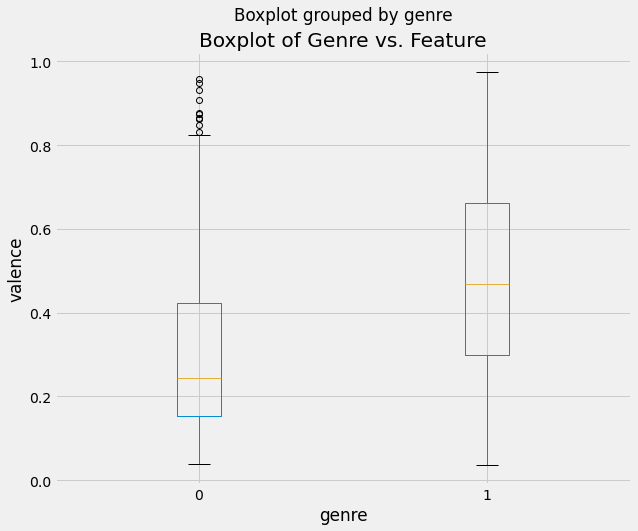

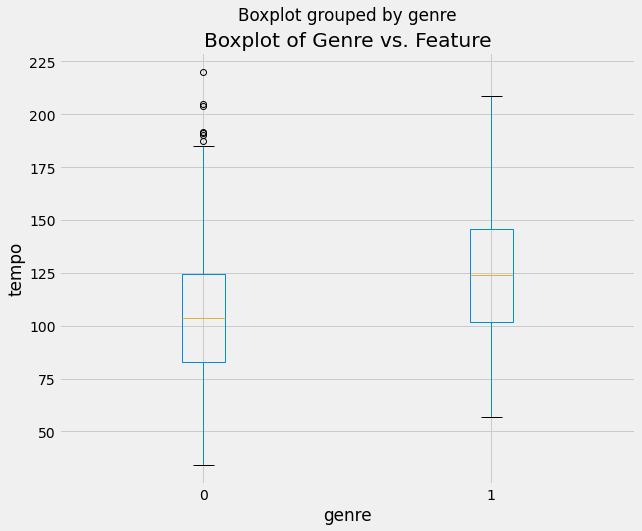

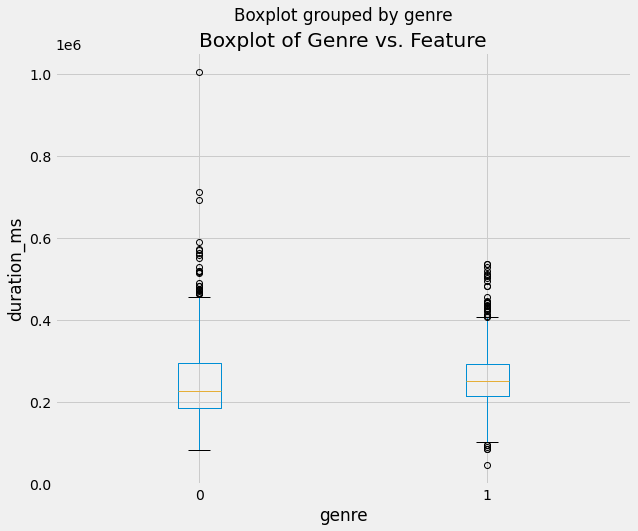

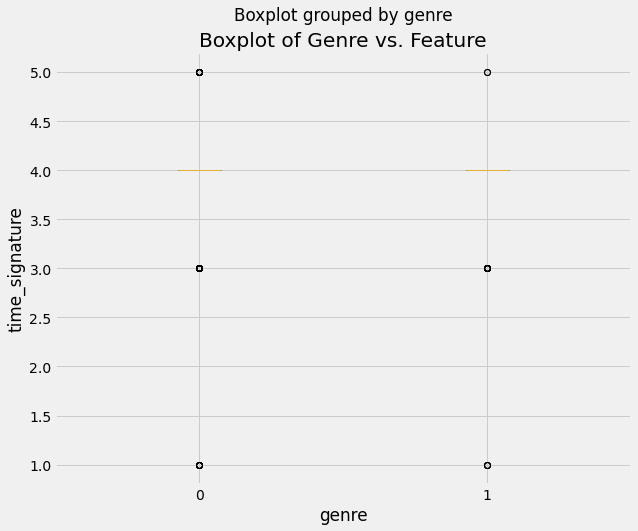

In [50]:
# even more box plots
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
for i in features:
    jazzROCK_numerical.boxplot(column=[i], by='genre', figsize=(10,8))
    plt.ylabel(i)
    plt.title('Boxplot of Genre vs. Feature')
    
# significant features
#energy
#loudness
#acousticness
#instrumentalness
#valence
#tempo

In [51]:
jazzROCK_standard = pd.DataFrame(
        {"Genre": jazzROCK_numerical["genre"],
         #"Danceability": minmax_scaling(jazzROCK_numerical["danceability"]),
         "Energy": minmax_scaling(jazzROCK_numerical["energy"]),
         #"Key": minmax_scaling(jazzROCK_numerical["key"]),
         "Loudness": minmax_scaling(jazzROCK_numerical["loudness"]),
         #"Mode": minmax_scaling(jazzROCK_numerical["mode"]),
         #"Speechiness": minmax_scaling(jazzROCK_numerical["speechiness"]),
         "Acousticness": minmax_scaling(jazzROCK_numerical["acousticness"]),
         "Instrumentalness": minmax_scaling(jazzROCK_numerical["instrumentalness"]),
         #"Liveness": minmax_scaling(jazzROCK_numerical["liveness"]),
         "Valence": minmax_scaling(jazzROCK_numerical["valence"]),
         "Tempo": minmax_scaling(jazzROCK_numerical["tempo"]),
         #"Duration_MS": minmax_scaling(jazzROCK_numerical["duration_ms"])
        })
jazzROCK_standard

,Genre,Energy,Loudness,Acousticness,Instrumentalness,Valence,Tempo
0,0,0.121859,0.244298,0.932663,0.634615,0.095076,0.449585
1,0,0.023232,0.183595,0.997990,0.959514,0.118525,0.484618
2,0,0.114785,0.472157,0.985930,0.933198,0.252825,0.460042
3,0,0.007064,0.115828,0.995980,0.936235,0.422298,0.276032
4,0,0.062036,0.423898,0.971859,0.170040,0.241100,0.483525
...,...,...,...,...,...,...,...
2106,1,0.532129,0.794322,0.049445,0.000000,0.209124,0.590624
2107,1,0.524045,0.791814,0.524622,0.000002,0.356214,0.825031
2108,1,0.560424,0.768609,0.008751,0.000005,0.340226,0.287108
2109,1,0.817096,0.814788,0.017787,0.002287,0.650394,0.269629


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset into features and target variable
X = jazzROCK_standard.drop(["Genre"], axis=1)
Y = jazzROCK_standard['Genre']

# Splitting the dataset into training and testing sets
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

# Creating KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn.fit(X_train3, Y_train3)

# Predicting the target variable for test set
Y_pred = knn.predict(X_test3)

In [53]:
np.mean(Y_test3==Y_pred)

0.91725768321513

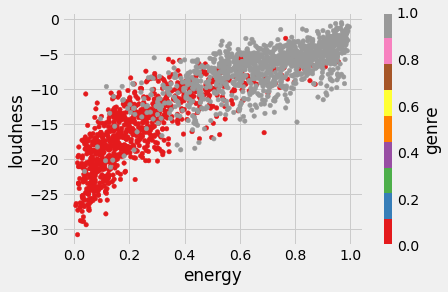

In [54]:
# significant features
#energy
#loudness
#acousticness
#instrumentalness
#valence
#tempo


# exhibit fundamental differences between genres
jazzROCK_numerical.plot.scatter('energy', 'loudness', c='genre',colormap='Set1');

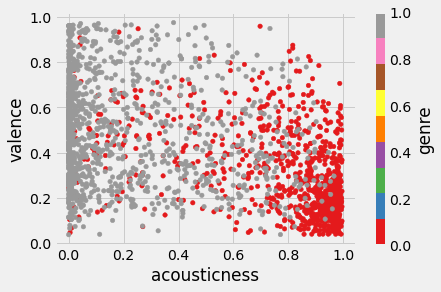

In [55]:
jazzROCK_numerical.plot.scatter('acousticness', 'valence', c='genre',colormap='Set1');

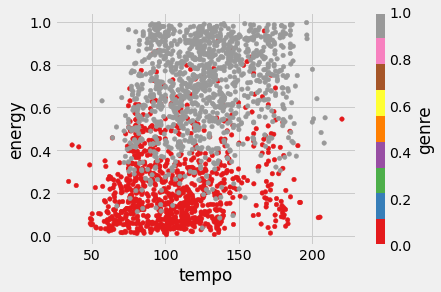

In [56]:
jazzROCK_numerical.plot.scatter('tempo', 'energy', c='genre',colormap='Set1');

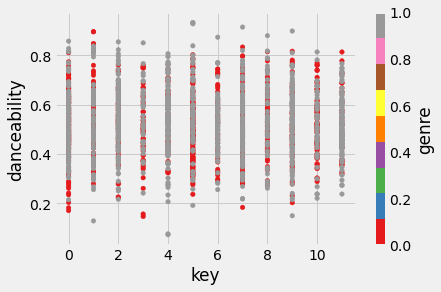

In [57]:
# show the ways the two genres are similar ... 
jazzROCK_numerical.plot.scatter('key', 'danceability', c='genre',colormap='Set1');

In [58]:
jazzROCK_standard_all = pd.DataFrame(
        {"Genre": jazzROCK_numerical["genre"],
         "Danceability": minmax_scaling(jazzROCK_numerical["danceability"]),
         "Energy": minmax_scaling(jazzROCK_numerical["energy"]),
         "Key": minmax_scaling(jazzROCK_numerical["key"]),
         "Loudness": minmax_scaling(jazzROCK_numerical["loudness"]),
         "Mode": minmax_scaling(jazzROCK_numerical["mode"]),
         "Speechiness": minmax_scaling(jazzROCK_numerical["speechiness"]),
         "Acousticness": minmax_scaling(jazzROCK_numerical["acousticness"]),
         "Instrumentalness": minmax_scaling(jazzROCK_numerical["instrumentalness"]),
         "Liveness": minmax_scaling(jazzROCK_numerical["liveness"]),
         "Valence": minmax_scaling(jazzROCK_numerical["valence"]),
         "Tempo": minmax_scaling(jazzROCK_numerical["tempo"]),
         "Duration_MS": minmax_scaling(jazzROCK_numerical["duration_ms"])
        })
jazzROCK_standard_all

,Genre,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_MS
0,0,0.375436,0.121859,0.818182,0.244298,1.0,0.019491,0.932663,0.634615,0.700031,0.095076,0.449585,0.262013
1,0,0.470807,0.023232,0.000000,0.183595,1.0,0.040839,0.997990,0.959514,0.096011,0.118525,0.484618,0.290059
2,0,0.687137,0.114785,0.909091,0.472157,1.0,0.036755,0.985930,0.933198,0.104173,0.252825,0.460042,0.184469
3,0,0.266108,0.007064,0.909091,0.115828,1.0,0.034342,0.995980,0.936235,0.120498,0.422298,0.276032,0.096880
4,0,0.541754,0.062036,0.000000,0.423898,1.0,0.043624,0.971859,0.170040,0.105193,0.241100,0.483525,0.259245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0.562689,0.532129,0.909091,0.794322,0.0,0.003527,0.049445,0.000000,0.198041,0.209124,0.590624,0.200884
2107,1,0.438241,0.524045,0.272727,0.791814,1.0,0.007054,0.524622,0.000002,0.248036,0.356214,0.825031,0.194068
2108,1,0.460340,0.560424,0.818182,0.768609,1.0,0.003341,0.008751,0.000005,0.332721,0.340226,0.287108,0.267717
2109,1,0.369621,0.817096,0.818182,0.814788,1.0,0.052905,0.017787,0.002287,0.270483,0.650394,0.269629,0.264016


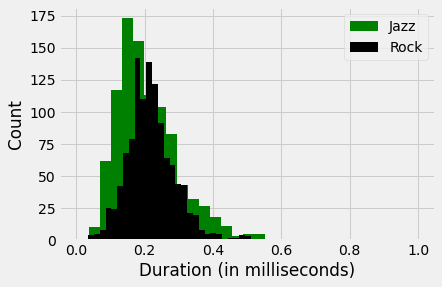

In [59]:
# show distribution of audio features between genres

#duration
jazz_dur = jazzROCK_standard_all.loc[jazzROCK_standard_all['Genre'] == 0].Duration_MS
rock_dur = jazzROCK_standard_all.loc[jazzROCK_standard_all['Genre'] == 1].Duration_MS

plt.hist(jazz_dur, bins=30, label='Jazz', color= 'green')
plt.hist(rock_dur, bins=30, label='Rock', color= 'black')
plt.xlabel('Duration (in milliseconds)')
plt.ylabel('Count')
plt.legend()
#title on report
plt.show()

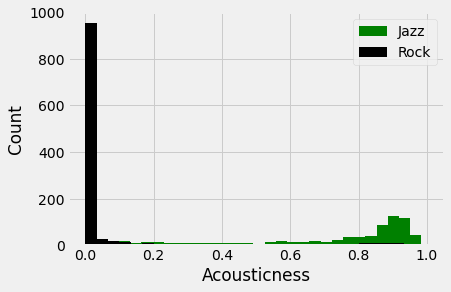

In [60]:
# instrumentalness
jazz_ins = jazzROCK_standard_all.loc[jazzROCK_standard_all['Genre'] == 0].Instrumentalness
rock_ins = jazzROCK_standard_all.loc[jazzROCK_standard_all['Genre'] == 1].Instrumentalness

plt.hist(jazz_ins, bins=30, label='Jazz', color= 'green')
plt.hist(rock_ins, bins=30, label='Rock', color= 'black')
plt.xlabel('Acousticness')
plt.ylabel('Count')
plt.legend()
plt.show()

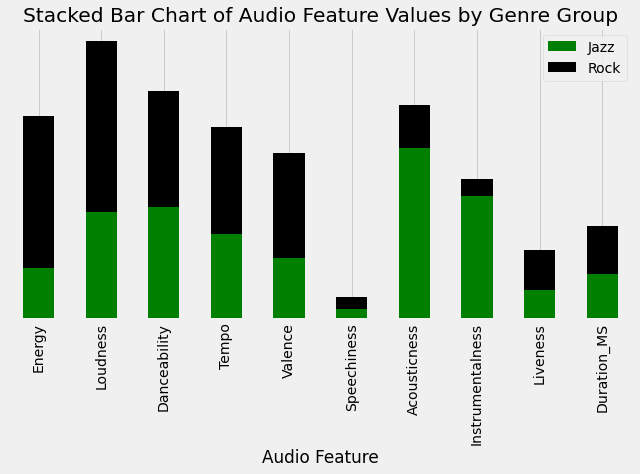

In [61]:
# Group the data by genre and calculate the mean of each audio feature
grouped_df = jazzROCK_standard_all.groupby("Genre")[["Energy", "Loudness", 'Danceability', 'Tempo', 'Valence', "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Duration_MS"]].mean()

# Transpose the dataframe so that the audio features become the rows
grouped_df = grouped_df.T

# Create a stacked bar chart of the transposed dataframe
colors = ['green', 'black']
ax = grouped_df.plot(kind="bar", stacked=True, figsize=(10, 5), color=colors)

# Set the title and axis labels
ax.set_title("Stacked Bar Chart of Audio Feature Values by Genre Group")
ax.set_xlabel("Audio Feature")
ax.set_ylabel("Audio Feature Value")

# Set the tick labels for the x-axis
labels = ["Energy", "Loudness", "Danceability", "Tempo", "Valence", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Duration_MS"]
ax.set_xticklabels(labels)

# Add legend and hide y-axis
plt.legend(['Jazz', 'Rock'])
ax.axes.get_yaxis().set_visible(False)

plt.show()

In [ ]:
def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def initialize_centroids(df,K):
    random_ids = np.random.permutation(df.shape[0])
    centroids = df.iloc[random_ids[:K]]
    return centroids

def compute_distance(df, centroids):
    K=centroids.shape[0]
    distances_ar = np.zeros((df.shape[0], K))
    
    # we used a similar approach  in developing kNN

    for k in range(K):
        point=centroids.iloc[k]        
        def distance_from_point(row):
            return distance(point, np.array(row))
        distances_ar[:,k] = df.apply(distance_from_point,axis=1).values
    return distances_ar
cent0=initialize_centroids(jazzROCK_standard,5)
dist_matrix=compute_distance(jazzROCK_standard, cent0)
# distances for the first 5 points
dist_matrix[:5,]

def compute_centroids(df, labels, K):
        centroids = np.zeros((K, df.shape[1]))
        for k in range(K):
            centroids[k, :] = df[labels == k].mean()
        return centroids

def compute_sse(df, labels, centroids,K):
    distances_ar = np.zeros(df.shape[0])
    for k in range(K):
        point=centroids.iloc[k]        
        def distance_from_point(row):
            return distance(point, np.array(row))
        distances_ar[labels == k] = df[labels == k].apply(distance_from_point,axis=1).values
    return np.sum(distances_ar)
    
def Kmeans_sse(df,K):
    #define the maximum number of iterations
    max_iter=20
    
    #initialize centroids
    centroids=initialize_centroids(df,K)
    
    for i in range(max_iter):
            old_centroids = centroids
            dist_matrix = compute_distance(df, old_centroids)
            clust=np.argmin(dist_matrix, axis=1)
            #print(compute_sse(df,clust,old_centroids,K))
            centroids = pd.DataFrame(compute_centroids(df,clust,K))
    
    # return SSE
    return compute_sse(df,clust,centroids,K)



K=np.arange(1,11)
sse=np.zeros(10)
for k in K:
    sse[k-1]=Kmeans_sse(jazzROCK_standard,k)

In [ ]:
plt.plot(K,sse[0:10])
plt.xlabel('Number of Clusters k')
plt.ylabel('Sum of Squared Distance');